Сулейманов Руслан 
к3141

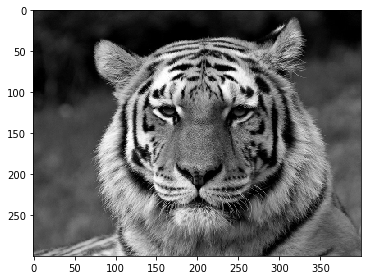

In [80]:
%matplotlib inline
import math as m
from skimage.io import imread, imsave, imshow
from scipy import signal
import numpy as np
import copy
sigma = 0.66
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
imshow(img)

Функция Гаусса: (по формуле со степика)

In [75]:
def Gauss(sigma,x,y):
    result = 1/((2*m.pi)*sigma**2)*m.exp((-x**2 - y**2)/(2*sigma**2))
    return result

Создание ядра: 

In [76]:
def core(sigma):   
    K = round(sigma*6+1)
    arr = [[0] * K for i in range(K)]
    S = 0
    for x in range(-(K//2),K//2+1):
        for y in range(-(K//2),K//2+1):
            S += Gauss(sigma,x,y)
    for x in range(-(K//2),K//2+1):
        for y in range(-(K//2),K//2+1):
            arr[x+K//2][y+K//2] = Gauss(sigma,x,y)/S
    return arr

Наложение ядра:

In [77]:
def filtr(img, core):
    res_img = signal.convolve2d(img, core, mode = "valid")
    res_img = (res_img).astype(np.uint8)
    return res_img
res = filtr(img, core(sigma))

[[ 38  39  40 ...   3   3   2]
 [ 40  41  41 ...   3   3   3]
 [ 40  41  40 ...   4   4   4]
 ...
 [126 126 126 ... 111 111 111]
 [144 134 122 ... 112 114 114]
 [130 119 105 ... 108 112 114]]


True

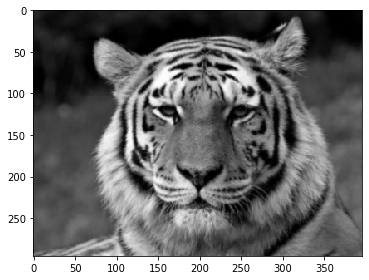

In [79]:
omg = imread('https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png')
print(omg)
imshow(omg)
np.array_equal(res, omg)